# Making the Visualizations from Day 1 Slides

For the complete documentation on Yellowbrick, checkout [scikit-yb.org](https://www.scikit-yb.org/)!

In [1]:
import warnings
import seaborn as sns

from yellowbrick.target import ClassBalance
from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_concrete
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores
from yellowbrick.features import PCA, Rank1D, Rank2D
from yellowbrick.classifier import ClassificationReport
from yellowbrick.target import BalancedBinningReference
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_spam, load_credit
from yellowbrick.datasets import load_energy, load_game
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.regressor import CooksDistance, ResidualsPlot

from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge, Lasso 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split as tts

warnings.filterwarnings("ignore") 

## Rank1D

[Rank1D](https://www.scikit-yb.org/en/develop/api/features/rankd.html#rank-1d) is a one-dimensional ranking of features utilizing (by default) the Shapiro-Wilk algorithm to assess the normality of the distribution of instances with respect to the feature.

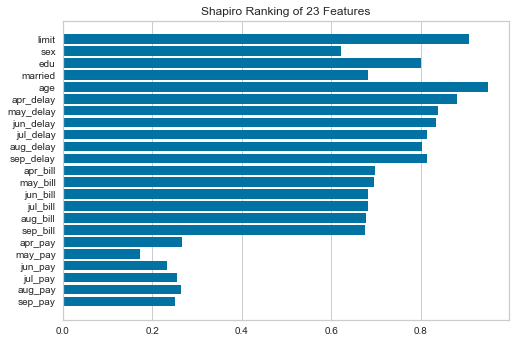

<AxesSubplot:title={'center':'Shapiro Ranking of 23 Features'}>

In [2]:
X_credit, y_credit = load_credit()
rank1d = Rank1D(algorithm="shapiro")
rank1d.fit(X_credit, y_credit)
rank1d.transform(X_credit)
rank1d.show()

## Rank 2D

[Rank2D](https://www.scikit-yb.org/en/develop/api/features/rankd.html#rank-2d) is a two-dimensional ranking of features utilizes a ranking algorithm that takes into account pairs of features at a time (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a feature co-occurence matrix.

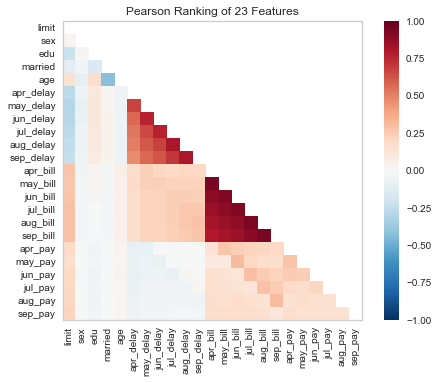

<AxesSubplot:title={'center':'Pearson Ranking of 23 Features'}>

In [3]:
rank2d = Rank2D(algorithm="pearson")
rank2d.fit(X_credit, y_credit)
rank2d.transform(X_credit)
rank2d.show()

## Cooks Distance

[Cook’s Distance](https://www.scikit-yb.org/en/develop/api/regressor/influence.html) is a measure of a single point's influence on a linear regression. Instances with a large influence may be outliers, and datasets with a large number of highly influential points might not be suitable for linear regression without further processing such as outlier removal or imputation.

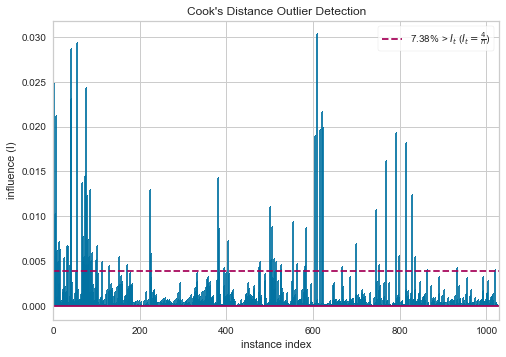

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [4]:
X_concrete, y_concrete = load_concrete()
cooks = CooksDistance()
cooks.fit(X_concrete, y_concrete)
cooks.show()

## SPLOM

A "SPLOM" (Scatterplot Matrix) is a plot of the pairwise relationships in a dataset. My favorite way to build sploms is with [Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot), but you can also do them with [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html).

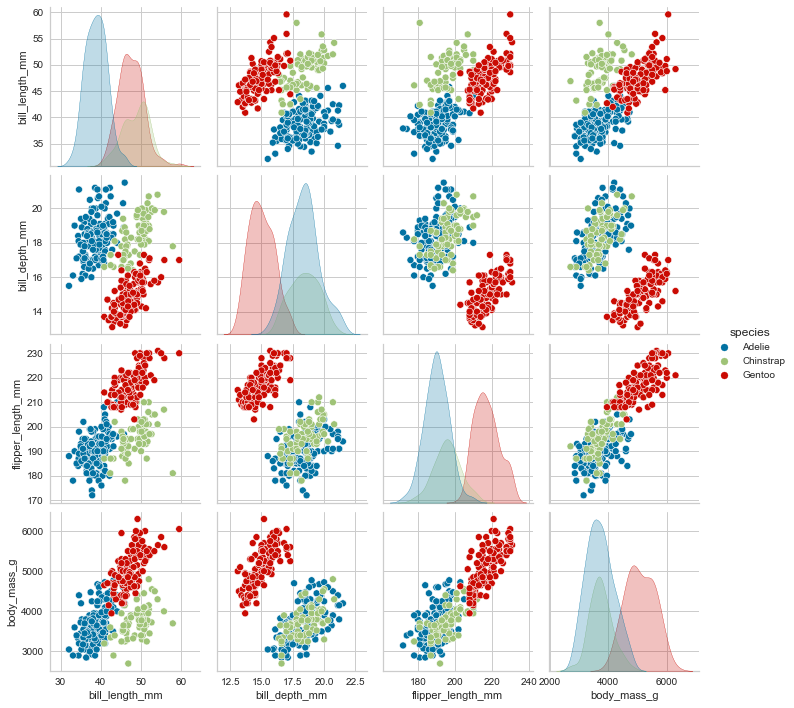

In [5]:
penguins_df = sns.load_dataset("penguins")
penguins_df = penguins_df.dropna()
sns.pairplot(penguins_df, hue="species")

## Jointplot

A [joinplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) is a plot of two variables with bivariate and univariate graphs.

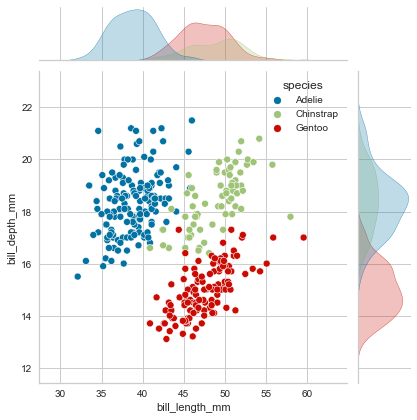

In [6]:
sns.jointplot(
    data=penguins_df, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    hue="species"
)

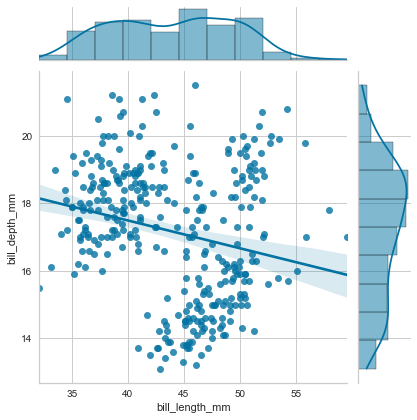

In [7]:
sns.jointplot(
    data=penguins_df, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    kind="reg"
)

## Feature Importances

A common approach to eliminating features is to describe their relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if the model fairs better during cross-validation. You can use the [FeatureImportances](https://www.scikit-yb.org/en/develop/api/model_selection/importances.html) visualizer for this purpose.

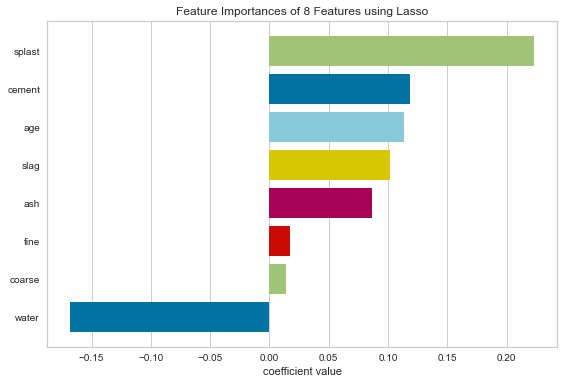

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Lasso'}, xlabel='coefficient value'>

In [8]:
feature_imp = FeatureImportances(
    Lasso(), 
    labels=X_concrete.columns, 
    relative=False
)

feature_imp.fit(X_concrete, y_concrete)
feature_imp.show()

### Stacked Feature Importances

Some estimators return a multi-dimensonal array for either `feature_importances_` or `coef_ attributes`. For example the `LogisticRegression` classifier returns a `coef_ array` in the shape of `(n_classes, n_features)` in the multiclass case. These coefficients map the importance of the feature to the prediction of the probability of a specific class. Although the interpretation of multi-dimensional feature importances depends on the specific estimator and model family, the data is treated the same in the `FeatureImportances` visualizer – namely the importances are averaged. Read more about stacked feature importances [here](https://www.scikit-yb.org/en/develop/api/model_selection/importances.html#stacked-feature-importances).

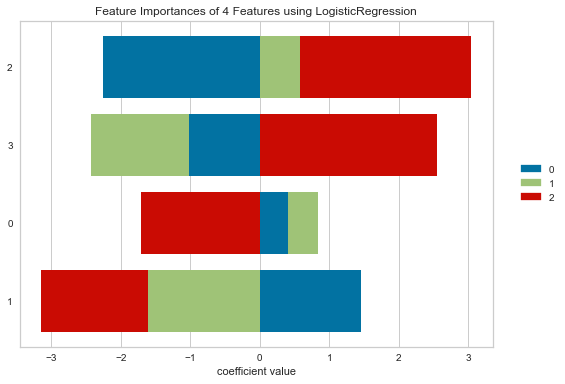

<AxesSubplot:title={'center':'Feature Importances of 4 Features using LogisticRegression'}, xlabel='coefficient value'>

In [9]:
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target

stacked = FeatureImportances(
    LogisticRegression(
        multi_class="auto", 
        solver="liblinear"
    ), 
    stack=True, 
    relative=False
)
stacked.fit(X_iris, y_iris)
stacked.show()

## Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s `coef_` or `feature_importances_` attributes, and by recursively eliminating a small number of features per loop, [RFECV](https://www.scikit-yb.org/en/develop/api/model_selection/rfecv.html) attempts to eliminate dependencies and collinearity that may exist in the model.

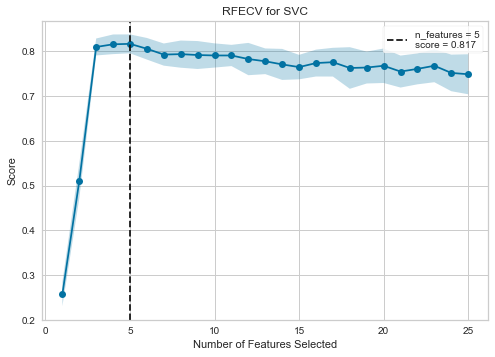

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [10]:
X_fake, y_fake = make_classification(
    n_samples=1000, n_features=25, n_informative=3, 
    n_redundant=2, n_repeated=0, n_classes=8, 
    n_clusters_per_class=1, random_state=0
)
rfecv = RFECV(SVC(kernel="linear", C=1))
rfecv.fit(X_fake, y_fake)
rfecv.show()

## PCA Projection

The PCA Decomposition visualizer utilizes principal component analysis to decompose high dimensional data into two or three dimensions so that each instance can be plotted in a scatter plot. The use of PCA means that the projected dataset can be analyzed along axes of principal variation and can be interpreted to determine if spherical distance metrics can be utilized.

This can be done in [two dimensions](https://www.scikit-yb.org/en/develop/api/features/pca.html)...

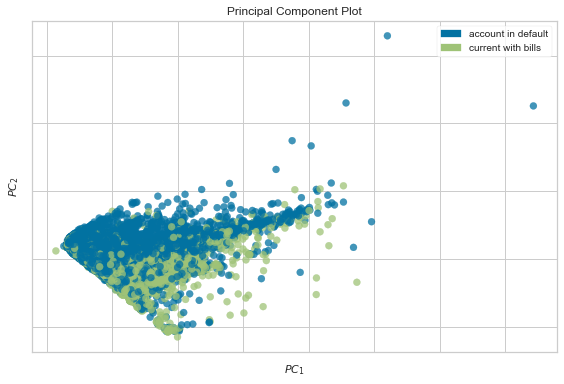

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [11]:
classes = ["account in default", "current with bills"]
pca_2d = PCA(scale=True, classes=classes)
pca_2d.fit_transform(X_credit, y_credit)
pca_2d.show()

Or in three:

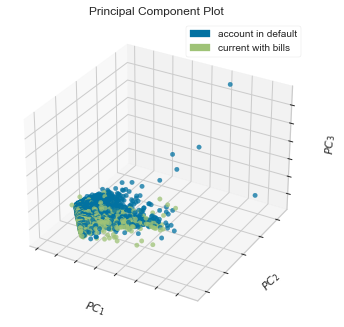

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [12]:
pca_3d = PCA(
    scale=True, projection=3, classes=classes
)
pca_3d.fit_transform(X_credit, y_credit)
pca_3d.show()

## Residuals Plot

[Residuals](https://www.scikit-yb.org/en/develop/api/regressor/residuals.html), in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

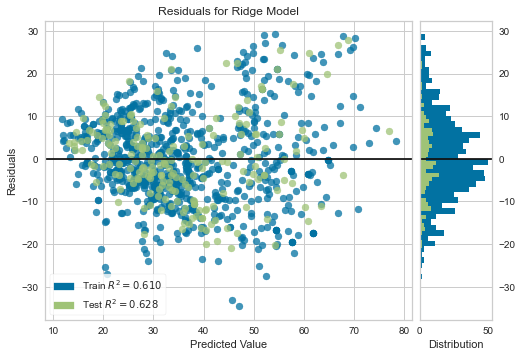

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
# Create the train and test data
X_conc_train, X_conc_test, y_conc_train, y_conc_test = tts(
    X_concrete, y_concrete, test_size=0.2, random_state=42
)
residuals = ResidualsPlot(Ridge())
residuals.fit(X_conc_train, y_conc_train)
residuals.score(X_conc_test, y_conc_test)
residuals.show()

## Classification Heatmap

The [classification report visualizer](https://www.scikit-yb.org/en/develop/api/classifier/classification_report.html) displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

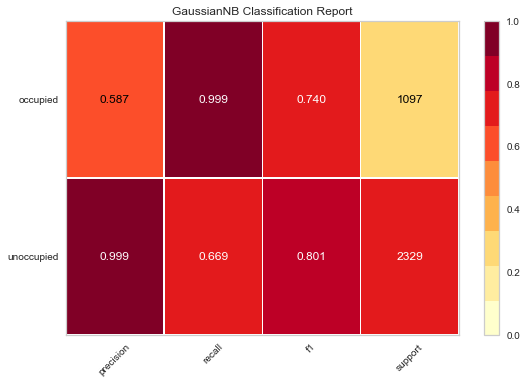

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [14]:
X_occ, y_occ = load_occupancy()
classes = ["unoccupied", "occupied"]

tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X_occ):
    X_occ_train = X_occ.iloc[train_index]
    X_occ_test = X_occ.iloc[test_index]
    y_occ_train = y_occ.iloc[train_index]
    y_occ_test = y_occ.iloc[test_index]

cr_heatmap = ClassificationReport(
    GaussianNB(), 
    classes=classes, 
    support=True
)
cr_heatmap.fit(X_occ_train, y_occ_train)
cr_heatmap.score(X_occ_test, y_occ_test)
cr_heatmap.show()

## Cross Validation Scores

Generally we determine whether a given model is optimal by looking at it’s F1, precision, recall, and accuracy (for classification), or it’s coefficient of determination (R2) and error (for regression). However, real world data is often distributed somewhat unevenly, meaning that the fitted model is likely to perform better on some sections of the data than on others. Yellowbrick’s [CVScores](https://www.scikit-yb.org/en/develop/api/model_selection/cross_validation.html) visualizer enables us to visually explore these variations in performance using different cross validation strategies.

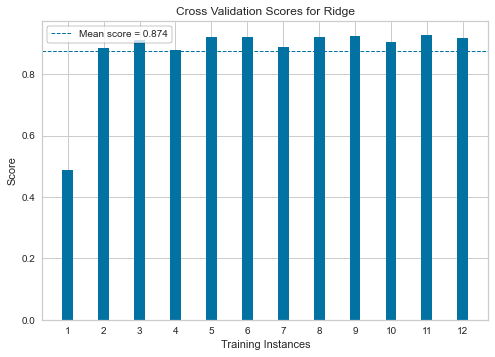

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [15]:
X_energy, y_energy = load_energy()
cv = KFold(n_splits=12, random_state=42)
folds = CVScores(Ridge(), cv=cv, scoring="r2")
folds.fit(X_energy, y_energy)
folds.show()

## Class Balance

One of the biggest challenges for classification models is an imbalance of classes in the training data. Severe class imbalances may be masked by relatively good F1 and accuracy scores – the classifier is simply guessing the majority class and not making any evaluation on the underrepresented class.

There are several techniques for dealing with class imbalance such as stratified sampling, down sampling the majority class, weighting, etc. But before these actions can be taken, it is important to understand what the class balance is in the training data. The [ClassBalance](https://www.scikit-yb.org/en/develop/api/target/class_balance.html) visualizer supports this by creating a bar chart of the support for each class, that is the frequency of the classes’ representation in the dataset.

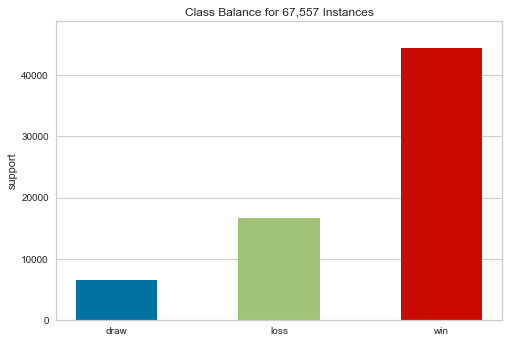

<AxesSubplot:title={'center':'Class Balance for 67,557 Instances'}, ylabel='support'>

In [16]:
_, y_game = load_game()
cb = ClassBalance(labels=["draw", "loss", "win"])
cb.fit(y_game)
cb.show()

## Class Prediction Error

The Yellowbrick [ClassPredictionError plot](https://www.scikit-yb.org/en/develop/api/classifier/class_prediction_error.html) is a twist on other and sometimes more familiar classification model diagnostic tools like the Confusion Matrix and Classification Report. Like the Classification Report, this plot shows the support (number of training samples) for each class in the fitted classification model as a stacked bar chart. Each bar is segmented to show the proportion of predictions (including false negatives and false positives, like a Confusion Matrix) for each class. You can use a ClassPredictionError to visualize which classes your classifier is having a particularly difficult time with, and more importantly, what incorrect answers it is giving on a per-class basis. This can often enable you to better understand strengths and weaknesses of different models and particular challenges unique to your dataset.

The class prediction error chart provides a way to quickly understand how good your classifier is at predicting the right classes.

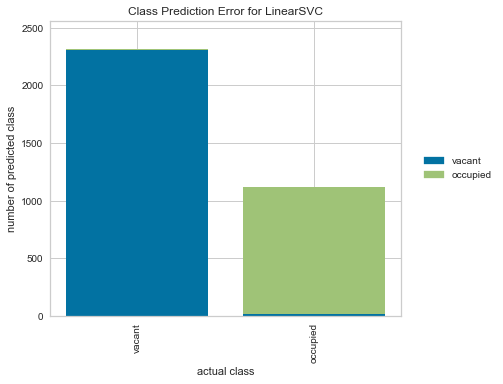

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [17]:
cpe = ClassPredictionError(
    LinearSVC(random_state=42),
    classes=["vacant", "occupied"]
)
cpe.fit(X_occ_train, y_occ_train)
cpe.score(X_occ_test, y_occ_test)
cpe.show()

## Balanced Binning Reference

Frequently, machine learning problems in the real world suffer from the curse of dimensionality; you have fewer training instances than you’d like and the predictive signal is distributed (often unpredictably!) across many different features.

Sometimes when the your target variable is continuously-valued, there simply aren’t enough instances to predict these values to the precision of regression. In this case, we can sometimes transform the regression problem into a classification problem by binning the continuous values into makeshift classes.

To help the user select the optimal number of bins, the [BalancedBinningReference](https://www.scikit-yb.org/en/develop/api/target/binning.html) visualizer takes the target variable y as input and generates a histogram with vertical lines indicating the recommended value points to ensure that the data is evenly distributed into each bin.

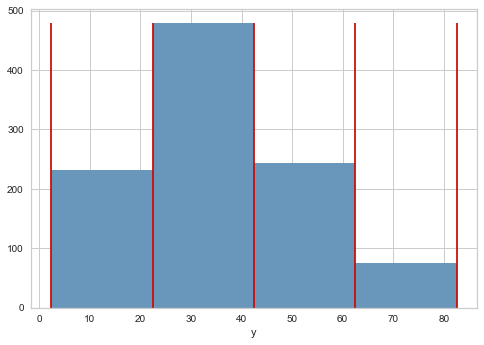

<AxesSubplot:xlabel='y'>

In [18]:
binner = BalancedBinningReference()
binner.fit(y_concrete)
binner.show()

## Discrimination Threshold

A visualization of precision, recall, f1 score, and queue rate with respect to the discrimination threshold of a binary classifier. The [discrimination threshold](https://www.scikit-yb.org/en/develop/api/classifier/threshold.html) is the probability or score at which the positive class is chosen over the negative class. Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.

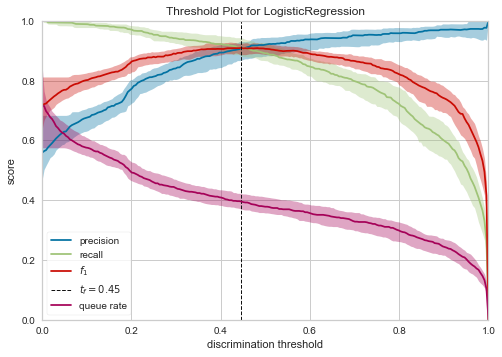

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [19]:
X_spam, y_spam = load_spam()
thresholder = DiscriminationThreshold(
    LogisticRegression(
        multi_class="auto", 
        solver="liblinear"
    )
)
thresholder.fit(X_spam, y_spam)
thresholder.show()